In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import os
import util

In [2]:
from sklearn import preprocessing 
from sklearn.metrics import pairwise 
from pandas.plotting import parallel_coordinates
from kmodes.kmodes import KModes

In [6]:
ksi_df = pd.read_csv('Data\KSI.csv')

In [7]:
pd.set_option('max_columns', None)

In [8]:
df = ksi_df.iloc[ksi_df['ACCNUM'].drop_duplicates().index]

In [20]:
df['INVTYPE'].str.contains('Driver')

0       True
4       True
7       True
9       True
20      True
        ... 
6053    True
6057    True
6059    True
6061    True
6068    True
Name: INVTYPE, Length: 994, dtype: bool

In [10]:
df = ksi_df[ksi_df['INVTYPE'].str.contains('Driver')]

In [12]:
df['TRAFFCTL'] = df['TRAFFCTL'].apply(util.tc)

<ipython-input-12-1c8edf1724da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TRAFFCTL'] = df['TRAFFCTL'].apply(util.tc)


In [13]:
df['DRIVACT'] = df['DRIVACT'].apply(util.actc)
df['DRIVCOND'] = df['DRIVCOND'].apply(util.condc)

<ipython-input-13-7cb1e02ec4df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVACT'] = df['DRIVACT'].apply(util.actc)
<ipython-input-13-7cb1e02ec4df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRIVCOND'] = df['DRIVCOND'].apply(util.condc)


In [14]:
# variables clustering on

cols = ['MANOEUVER', 'DRIVACT', 'DRIVCOND', 'TRAFFCTL', 'SPEEDING', 'ALCOHOL', 'REDLIGHT', 'AG_DRIV']

In [16]:
cluster_cols = df[cols]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2571.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2571.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2571.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2571.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2571.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 228, cost: 1873.0
Run 1, iteration: 2/100, moves: 25, cost: 1873.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 121, cost: 2233.0
Init: initializing centroids


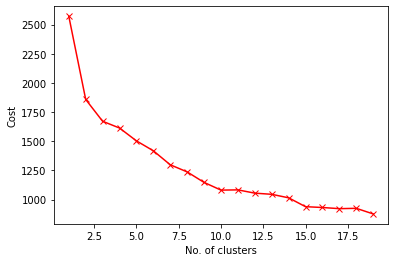

In [29]:
cost = []
k = range(1,20)
for num_clusters in k:
  kmode = KModes(n_clusters= num_clusters, init = "random", n_init = 5, verbose=1, random_state = 1)
  kmode.fit_predict(cluster_cols)
  cost.append(kmode.cost_)

plt.plot(k, cost, 'bx-', color = 'red')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.show()

In [46]:
df.MANOEUVER.unique()

array(['Turning Left', 'Going Ahead', 'Stopped', 'Unknown',
       'Turning Right', 'Overtaking', 'Slowing or Stopping', 'Reversing',
       'Parked', 'Changing Lanes', 'Other', 'Making U Turn',
       'Pulling Away from Shoulder or Curb', 'Merging',
       'Pulling Onto Shoulder or towardCurb'], dtype=object)

In [47]:
df.DRIVCOND.unique()

array(['Unknown', 'Ability Impaired (Drugs/Alcohol)', 'Normal',
       'Medical or Physical Disability', '<Null>', 'Inattentive', 'Other',
       'Fatigue'], dtype=object)

In [17]:
kmode = KModes(n_clusters= 10, init = "random", n_init = 5, verbose=0, random_state = 1)
clusters = kmode.fit_predict(cluster_cols)

In [18]:
cluster_cols.insert(0, "Cluster", clusters, True)

In [19]:
cluster_cols

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,5,Turning Left,Failed to Yield Right of Way,Unknown,Traffic Signal,<Null>,<Null>,<Null>,Yes
2,6,Turning Right,Disobeyed Traffic Control,Unknown,Traffic Signal,<Null>,<Null>,Yes,Yes
3,6,Going Ahead,Driving Properly,Unknown,Traffic Signal,<Null>,<Null>,Yes,Yes
4,3,Going Ahead,Other,Ability Impaired (Drugs/Alcohol),No Control,<Null>,Yes,<Null>,<Null>
7,5,Turning Left,Failed to Yield Right of Way,Ability Impaired (Drugs/Alcohol),Traffic Signal,<Null>,Yes,<Null>,Yes
...,...,...,...,...,...,...,...,...,...
16853,1,Going Ahead,Driving Properly,Normal,Traffic Signal,<Null>,<Null>,<Null>,Yes
16854,3,Going Ahead,Improper Passing,Unknown,No Control,<Null>,<Null>,<Null>,Yes
16856,7,Turning Left,Failed to Yield Right of Way,Inattentive,Traffic Signal,<Null>,<Null>,<Null>,Yes
16857,1,Going Ahead,Driving Properly,Normal,Traffic Signal,<Null>,<Null>,<Null>,Yes


In [20]:
cluster_cols.to_csv('Clustered_KSI.csv')

In [34]:
cluster_cols[cluster_cols['Cluster'] == 0].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,0,Going Ahead,Driving Properly,Normal,Traffic Signal,<Null>,<Null>,<Null>,<Null>


In [44]:
cluster_cols[cluster_cols['Cluster'] == 1].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,1,Going Ahead,Failed to Yield Right of Way,Normal,No Control,<Null>,<Null>,<Null>,Yes


In [35]:
cluster_cols[cluster_cols['Cluster'] == 2].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,2,Going Ahead,Driving Properly,Normal,No Control,<Null>,<Null>,<Null>,<Null>


In [36]:
cluster_cols[cluster_cols['Cluster'] == 3].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,3,Going Ahead,Disobeyed Traffic Control,Normal,Traffic Signal,<Null>,<Null>,Yes,Yes


In [37]:
cluster_cols[cluster_cols['Cluster'] == 4].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,4,Parked,Other,Unknown,No Control,<Null>,<Null>,<Null>,<Null>


In [48]:
cluster_cols[cluster_cols['Cluster'] == 4]

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
130,4,Unknown,Other,Unknown,Stop/Yield Sign,<Null>,<Null>,<Null>,<Null>
389,4,Going Ahead,Other,Unknown,No Control,<Null>,<Null>,<Null>,<Null>
394,4,Parked,Other,Inattentive,No Control,<Null>,<Null>,<Null>,<Null>
558,4,Parked,Other,Unknown,No Control,<Null>,<Null>,<Null>,<Null>
743,4,Other,Other,Ability Impaired (Drugs/Alcohol),No Control,<Null>,Yes,<Null>,<Null>
810,4,Going Ahead,Other,Unknown,No Control,<Null>,<Null>,<Null>,<Null>
890,4,Parked,Other,Unknown,No Control,<Null>,<Null>,<Null>,<Null>
1078,4,Overtaking,Other,Inattentive,No Control,<Null>,<Null>,<Null>,<Null>
1569,4,Going Ahead,Other,Unknown,No Control,<Null>,<Null>,<Null>,<Null>
1731,4,Overtaking,Lost control,Unknown,No Control,<Null>,<Null>,<Null>,<Null>


In [38]:
cluster_cols[cluster_cols['Cluster'] == 5].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,5,Going Ahead,Speed too Fast For Condition,Ability Impaired (Drugs/Alcohol),No Control,Yes,<Null>,<Null>,Yes


In [39]:
cluster_cols[cluster_cols['Cluster'] == 6].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,6,Going Ahead,Lost control,Medical or Physical Disability,No Control,<Null>,<Null>,<Null>,<Null>


In [40]:
cluster_cols[cluster_cols['Cluster'] == 7].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,7,Going Ahead,Driving Properly,Normal,Stop/Yield Sign,<Null>,<Null>,<Null>,Yes


In [41]:
cluster_cols[cluster_cols['Cluster'] == 8].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,8,Turning Left,Failed to Yield Right of Way,Normal,Traffic Signal,<Null>,<Null>,<Null>,Yes


In [42]:
cluster_cols[cluster_cols['Cluster'] == 9].apply(lambda x: x.mode())

,Cluster,MANOEUVER,DRIVACT,DRIVCOND,TRAFFCTL,SPEEDING,ALCOHOL,REDLIGHT,AG_DRIV
0,9,Turning Left,Improper Turn,Normal,Traffic Signal,<Null>,<Null>,<Null>,<Null>


#Pedestrian clustering

In [58]:
ped_df = ksi_df[ksi_df['INVTYPE'] == 'Pedestrian']

In [65]:
ped_df = ped_df.drop_duplicates(subset= 'ACCNUM')

In [75]:
ped_col = ['PEDTYPE', 'PEDACT', 'PEDCOND', 'DISABILITY','RDSFCOND', 'TRAFFCTL', 'VISIBILITY']

In [70]:
def lc(x):
    if x in ('Dawn, artificial', 'Dusk, artificial', 'Dark, artificial', 'Daylight, artificial'):
        return 'Artificial'
    return x

In [71]:
ped_df['VISIBILITY'] = ped_df['VISIBILITY'].apply(lc)
ped_df['TRAFFCTL'] = ped_df['TRAFFCTL'].apply(tc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
ped_cluster_col = ped_df[ped_col]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2592.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2592.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2592.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2592.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2592.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 51, cost: 1920.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 40, cost: 2192.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...


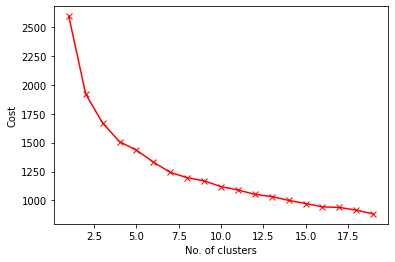

In [77]:
cost = []
K = range(1,20)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1, random_state = 1)
    kmode.fit_predict(ped_cluster_col)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-', color = 'red')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.show()

In [78]:
kmode_ped = KModes(n_clusters= 8, init = "random", n_init = 5, verbose=0, random_state = 1)
clusters_ped = kmode.fit_predict(ped_cluster_col)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 113, cost: 1019.0
Run 1, iteration: 2/100, moves: 10, cost: 1019.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 231, cost: 956.0
Run 2, iteration: 2/100, moves: 95, cost: 922.0
Run 2, iteration: 3/100, moves: 24, cost: 922.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 116, cost: 1022.0
Run 3, iteration: 2/100, moves: 33, cost: 1022.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 136, cost: 898.0
Run 4, iteration: 2/100, moves: 37, cost: 884.0
Run 4, iteration: 3/100, moves: 11, cost: 884.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 248, cost: 935.0
Run 5, iteration: 2/100, moves: 55, cost: 935.0
Best run was nu

In [88]:
ped_cluster_col.insert(0, "Cluster", clusters_ped, True)

In [89]:
ped_cluster_col[ped_cluster_col['Cluster'] == 0].apply(lambda x: x.mode())

,Cluster,PEDTYPE,PEDACT,PEDCOND,DISABILITY,RDSFCOND,TRAFFCTL,VISIBILITY
0,0,Pedestrian hit at mid-block,Running onto Roadway,Inattentive,<Null>,Wet,No Control,Rain


In [90]:
ped_cluster_col[ped_cluster_col['Cluster'] == 1].apply(lambda x: x.mode())

,Cluster,PEDTYPE,PEDACT,PEDCOND,DISABILITY,RDSFCOND,TRAFFCTL,VISIBILITY
0,1,Pedestrian hit a PXO/ped. Mid-block signal,"Crossing, Pedestrian Crossover",Normal,<Null>,Dry,Pedestrian Crossover,Clear


In [91]:
ped_cluster_col[ped_cluster_col['Cluster'] == 2].apply(lambda x: x.mode())

,Cluster,PEDTYPE,PEDACT,PEDCOND,DISABILITY,RDSFCOND,TRAFFCTL,VISIBILITY
0,2,Pedestrian hit at mid-block,"Crossing, no Traffic Control",Inattentive,<Null>,Dry,No Control,Clear


In [92]:
ped_cluster_col[ped_cluster_col['Cluster'] == 3].apply(lambda x: x.mode())

,Cluster,PEDTYPE,PEDACT,PEDCOND,DISABILITY,RDSFCOND,TRAFFCTL,VISIBILITY
0,3,Vehicle is going straight thru inter.while ped...,Crossing without right of way,Normal,<Null>,Wet,Traffic Signal,Rain


In [93]:
ped_cluster_col[ped_cluster_col['Cluster'] == 4].apply(lambda x: x.mode())

,Cluster,PEDTYPE,PEDACT,PEDCOND,DISABILITY,RDSFCOND,TRAFFCTL,VISIBILITY
0,4,Pedestrian hit on sidewalk or shoulder,On Sidewalk or Shoulder,Normal,<Null>,Dry,No Control,Clear


In [94]:
ped_cluster_col[ped_cluster_col['Cluster'] == 5].apply(lambda x: x.mode())

,Cluster,PEDTYPE,PEDACT,PEDCOND,DISABILITY,RDSFCOND,TRAFFCTL,VISIBILITY
0,5,Vehicle turns left while ped crosses with ROW ...,Crossing with right of way,Normal,<Null>,Wet,No Control,Clear


In [95]:
ped_cluster_col[ped_cluster_col['Cluster'] == 6].apply(lambda x: x.mode())

,Cluster,PEDTYPE,PEDACT,PEDCOND,DISABILITY,RDSFCOND,TRAFFCTL,VISIBILITY
0,6,Pedestrian hit at mid-block,Running onto Roadway,Had Been Drinking,<Null>,Dry,No Control,Clear


In [96]:
ped_cluster_col[ped_cluster_col['Cluster'] == 7].apply(lambda x: x.mode())

,Cluster,PEDTYPE,PEDACT,PEDCOND,DISABILITY,RDSFCOND,TRAFFCTL,VISIBILITY
0,7,Pedestrian hit on sidewalk or shoulder,On Sidewalk or Shoulder,Normal,<Null>,Dry,Traffic Signal,Clear
